In [1]:
import torch
from torch.utils.data import Dataset
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class CustomDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

In [3]:
class HopfieldDataset(CustomDataset):
    def __init__(self, num_samples,num_neurons=100,device='cpu'):
        thetas=0.5*torch.ones((num_samples,num_neurons))
        self.data = 2*torch.bernoulli(thetas)-1
        self.data = self.data.to(device)
        super().__init__(self.data)

In [4]:
class EncoderDataset(CustomDataset):
    def __init__(self,n_visible_a,n_visible_b,device='cpu'):
        v_a_data = torch.eye(n_visible_a)
        ordered = torch.eye(n_visible_b)
        v_b_data = ordered[torch.randperm(n_visible_b)]
        self.data = torch.cat((v_a_data,v_b_data),1)
        self.data = self.data.to(device)
        super().__init__(self.data)

In [64]:
class BasicEncoderDataset(CustomDataset):
    def __init__(self,n_visible,reps,device='cpu'):
        """
        reps: control parameter for correlation
        """
        #create correlated data
        correlated_patterns = torch.zeros(n_visible,2*n_visible)
        for i in range(n_visible):
            correlated_patterns[i,i] = 1
            correlated_patterns[i,n_visible+i] = 1
        patterns = correlated_patterns
        #binary to bipolar
        patterns = 2*patterns-1
        #finish
        self.data = patterns
        super().__init__(self.data)

In [ ]:
class CorrelatedEncoderDataset(CustomDataset):
    def __init__(self,n_visible,reps,device='cpu'):
        """
        reps: control parameter for correlation
        """
        #generate all possible combinations of patterns
        loc_a = torch.arange(n_visible)
        indices = torch.combinations(loc_a)
        #create a pattern for each
        patterns = torch.zeros((len(indices),2*n_visible))
        for i,pair in enumerate(indices):
            x,y = pair
            patterns[i,x] = 1
            patterns[i,n_visible+y] = 1
        #create correlated data
        correlated_patterns = torch.zeros(n_visible,2*n_visible)
        for i in range(n_visible):
            correlated_patterns[i,i] = 1
            correlated_patterns[i,n_visible+i] = 1
        #concat correlated_patterns
        correlated_patterns = correlated_patterns.repeat(reps,1)
        patterns = torch.concat((patterns,correlated_patterns))
        #binary to bipolar
        patterns = 2*patterns-1
        #finish
        self.data = patterns
        super().__init__(self.data)

In [67]:
y = CorrelatedEncoderDataset(4,2)
data = y.data[:]
n_patterns = data.shape[0]
data = data.reshape((n_patterns,2,-1))

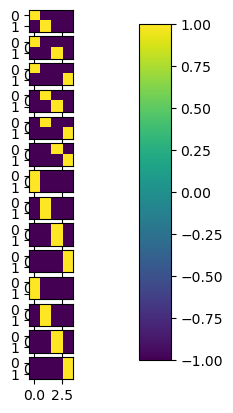

In [68]:
fig,axes = plt.subplots(n_patterns)
for ax,pattern in zip(axes,data):
    im = ax.imshow(pattern)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.6, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

In [6]:
def split_visible(t)->torch.Tensor:
    return torch.split(t,2)

In [18]:
y = EncoderDataset(4,4)
data = y.data[:]
n_patterns = data.shape[0]
data = data.reshape((n_patterns,2,-1))

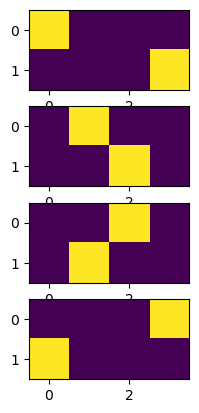

In [19]:
fig,axes = plt.subplots(n_patterns)
for ax,pattern in zip(axes,data):
    ax.imshow(pattern)